In [2]:
# Import modules
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
from sqlalchemy import create_engine, text
from sqlalchemy import inspect
import numpy as np

In [3]:
# Create a reference to the file. 
database_path = Path("Resources/loan_Data.sqlite")
engine = create_engine(f"sqlite:///{database_path}")

In [4]:
inspector = inspect(engine)
print(inspector.get_table_names())

['Loan_Data']


In [5]:
# Query All Records in the the Database
query = text("SELECT * FROM loan_Data")
data = engine.execute(query)

for record in data:
    print(record)

('0', '1', '2', ' Graduate', ' No', '96000', '299000', '12', '778', '24000', '176000', '227000', '80000', ' Approved')
('1', '2', '0', ' Not Graduate', ' Yes', '41000', '122000', '8', '417', '27000', '22000', '88000', '33000', ' Rejected')
('2', '3', '3', ' Graduate', ' No', '91000', '297000', '20', '506', '71000', '45000', '333000', '128000', ' Rejected')
('3', '4', '3', ' Graduate', ' No', '82000', '307000', '8', '467', '182000', '33000', '233000', '79000', ' Rejected')
('4', '5', '5', ' Not Graduate', ' Yes', '98000', '242000', '20', '382', '124000', '82000', '294000', '50000', ' Rejected')
('5', '6', '0', ' Graduate', ' Yes', '48000', '135000', '10', '319', '68000', '83000', '137000', '51000', ' Rejected')
('6', '7', '5', ' Graduate', ' No', '87000', '330000', '4', '678', '225000', '148000', '292000', '43000', ' Approved')
('7', '8', '2', ' Graduate', ' Yes', '57000', '150000', '20', '382', '132000', '57000', '118000', '60000', ' Rejected')
('8', '9', '0', ' Graduate', ' Yes', '800

In [6]:
data_df = pd.read_sql_query(query, engine)

In [7]:
# Read the CSV file into a Pandas DataFrame
#data_df = pd.read_csv(Path('Resources/loan_data_cleaned.csv'))

# Review the DataFrame
data_df.head() 

,?,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,0,1,2,Graduate,No,96000,299000,12,778,24000,176000,227000,80000,Approved
1,1,2,0,Not Graduate,Yes,41000,122000,8,417,27000,22000,88000,33000,Rejected
2,2,3,3,Graduate,No,91000,297000,20,506,71000,45000,333000,128000,Rejected
3,3,4,3,Graduate,No,82000,307000,8,467,182000,33000,233000,79000,Rejected
4,4,5,5,Not Graduate,Yes,98000,242000,20,382,124000,82000,294000,50000,Rejected


In [8]:
print(data_df.columns)

Index(['?', 'loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')


In [9]:
# label encoding the columns
data_df = data_df.replace({' loan_status': {' Approved': 1, ' Rejected': 0}, 
                 ' education': {' Graduate': 1, ' Not Graduate': 0}, 
                 ' self_employed': {' Yes': 1, ' No':0}})

In [10]:
data_df[' loan_status'].unique()

array([1, 0], dtype=int64)

In [10]:
data_df.head()

,?,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,0,1,2,1,0,96000,299000,12,778,24000,176000,227000,80000,1
1,1,2,0,0,1,41000,122000,8,417,27000,22000,88000,33000,0
2,2,3,3,1,0,91000,297000,20,506,71000,45000,333000,128000,0
3,3,4,3,1,0,82000,307000,8,467,182000,33000,233000,79000,0
4,4,5,5,0,1,98000,242000,20,382,124000,82000,294000,50000,0


In [11]:
print(data_df.columns)

Index(['?', 'loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')


In [12]:
# Separate the features, X, from the target variable, y
y = data_df[' loan_status']
X = data_df.drop(columns=' loan_status')

In [13]:
#drop the 'Unnamed: 0' and 'loan_id' columns
X = X.drop(columns=['?', 'loan_id'])

In [14]:
X.head()


,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,2,1,0,96000,299000,12,778,24000,176000,227000,80000
1,0,0,1,41000,122000,8,417,27000,22000,88000,33000
2,3,1,0,91000,297000,20,506,71000,45000,333000,128000
3,3,1,0,82000,307000,8,467,182000,33000,233000,79000
4,5,0,1,98000,242000,20,382,124000,82000,294000,50000


In [15]:
y.head()

0    1
1    0
2    0
3    0
4    0
Name:  loan_status, dtype: int64

Split the dataset into training and testing sets.
Initializes and fits a standard scaler using the training data.
Scales the features in both training and testing datasets using the parameters from the training data

In [16]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Fitting the Random Forest Model

In [17]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

## Making Predictions Using the Random Forest Model

In [18]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

## Model Evaluation

In [19]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Readable DataFrame
cm_df = pd.DataFrame(
    cm, index=["Actual Rejected", "Actual Approved"], columns=["Predicted Rejected", "Predicted Approved"]
)
# Calculating the accuracy score
# It's calculated as (true positives + true negatives) / total samples
acc_score = accuracy_score(y_test, predictions)

print("Confusion Matrix")
display(cm_df)

Confusion Matrix


,Predicted Rejected,Predicted Approved
Actual Rejected,402,15
Actual Approved,11,640


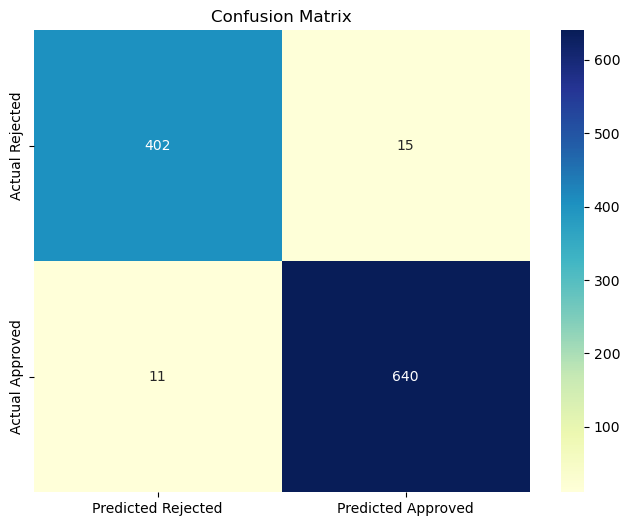

In [20]:
# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, cmap='YlGnBu', fmt="g")
plt.title("Confusion Matrix")
plt.show()

Confusion Matrix Summary:

True Negatives (TN): 402
Out of these, the model correctly predicted all 402 samples that were actually rejected.

True Positives (TP): 640
The model accurately identified all 640 samples that were genuinely approved.

False Positives (FP): 15
15 samples were erroneously predicted as approved despite being actually rejected.

False Negatives (FN): 11
11 samples that were truly approved were mistakenly classified a rejected by the model.

In [21]:
# Save confusion matrix to CSV
cm_df.to_csv("confusion_matrix.csv")

In [22]:
# Displaying results
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Accuracy Score : 0.9756554307116105
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       417
           1       0.98      0.98      0.98       651

    accuracy                           0.98      1068
   macro avg       0.98      0.97      0.97      1068
weighted avg       0.98      0.98      0.98      1068



Accuracy Score:
The model achieved an impressive accuracy of approximately 0.9757 or 97.57%. This means the model was accurate in its predictions about 97.57% of the time on the test data.

Classification Report:
For the rejected samples (Class 0):
Precision: 0.97 - Of all the samples predicted as rejected, 97% were actually rejected.
Recall: 0.96 - The model correctly predicted 96% of all the actual rejected samples.

For the approved samples (Class 1):
Precision: 0.98 - Of all the samples predicted as approved, 98% were indeed approved.
Recall: 0.98 - The model correctly predicted 98% of all the actual approved samples.

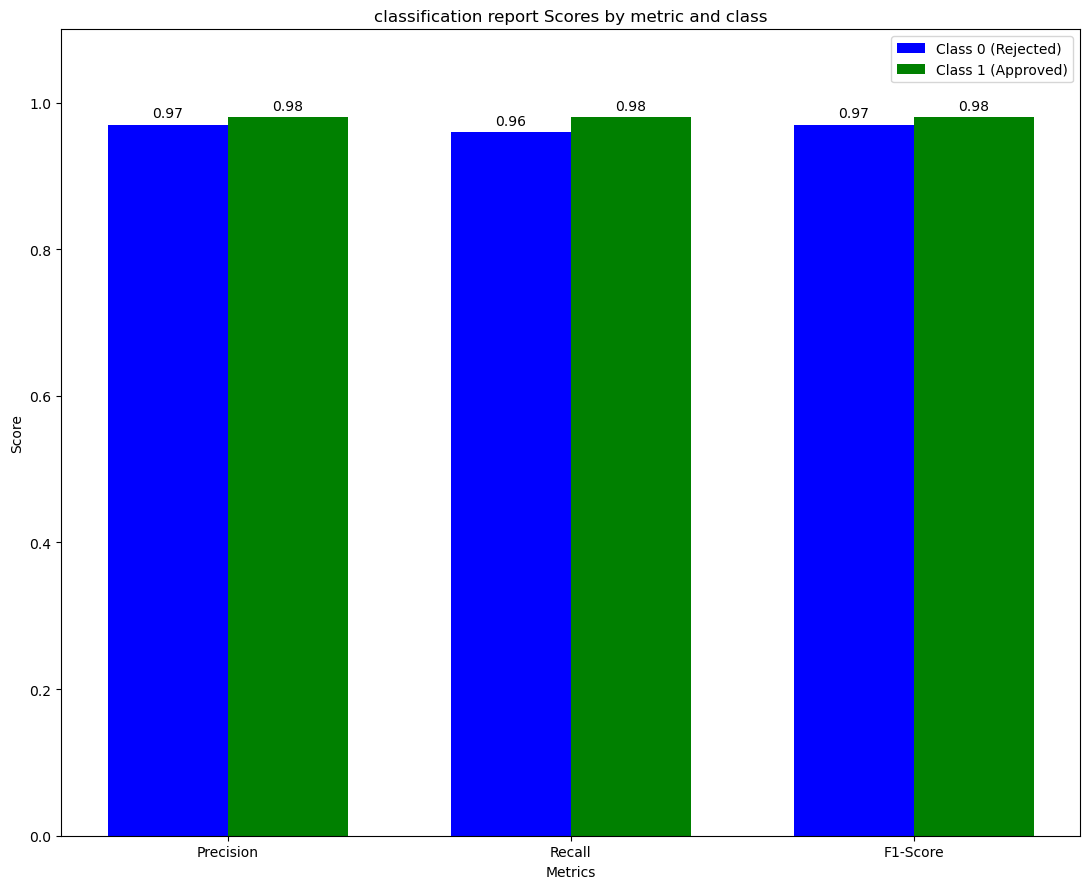

In [26]:
# Metrics from the classification report
labels = ['Precision', 'Recall', 'F1-Score']
class_0 = [0.97, 0.96, 0.97]  # Values for Class 0
class_1 = [0.98, 0.98, 0.98]  # Values for Class 1

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(11,9))
rects1 = ax.bar(x - width/2, class_0, width, label='Class 0 (Rejected)', color='blue')
rects2 = ax.bar(x + width/2, class_1, width, label='Class 1 (Approved)', color='green')

# labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Metrics')
ax.set_ylabel('Score')
ax.set_title('classification report Scores by metric and class')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.set_ylim([0, 1.1])  

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

Grouped bar chart visualizes the performance metrics (Precision, Recall, and F1-Score) of the model for two classes: Class 0 (Rejected) and Class 1 (Approved).

Precision:
For Class 0 (Rejected): The precision is 0.97, meaning that 97% of the instances predicted as "Rejected" by the model were indeed Rejected.
For Class 1 (Approved): The precision is 0.98, indicating that 98% of the instances predicted as "Approved" were correct.

Recall:
For Class 0 (Rejected): The recall is 0.96, meaning the model correctly identified 96% of all actual Rejected instances.
For Class 1 (Approved): The recall is 0.98, implying the model correctly identified 98% of all actual Approved instances.

F1-Score:
For both classes, the F1-score is 0.97. The F1-score is a harmonic mean of precision and recall, and a high F1-score is indicative of a balanced classifier in terms of both false positives and false negatives.

In conclusion:
(Precision, Recall, and F1-Score) metrics are close to 1, which suggests that the model performs exceptionally well in predicting both Rejected and Approved classes.

In [25]:
#Saving classification report to CSV

# Convert classification report into a dictionary
report_dict = classification_report(y_test, predictions, output_dict=True)

# Convert dictionary into a DataFrame
report_df = pd.DataFrame(report_dict).transpose()

# Save classification report to CSV
report_df.to_csv("classification_report.csv")

## Feature Importance

In [26]:

# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_

# Sort the features by their importance
sorted_importances = sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

# Print the sorted importances with two decimal places
for importance, feature_name in sorted_importances:
    print(f"{feature_name}: {importance:.2f}")

 cibil_score: 0.81
 loan_term: 0.06
 loan_amount: 0.03
 income_annum: 0.02
 luxury_assets_value: 0.02
 residential_assets_value: 0.02
 commercial_assets_value: 0.02
 bank_asset_value: 0.02
 no_of_dependents: 0.01
 self_employed: 0.00
 education: 0.00


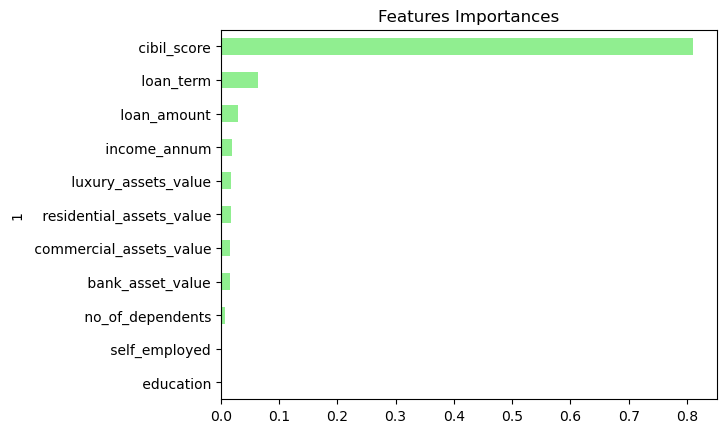

In [27]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted_importances)
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title='Features Importances', legend=False)
plt.show()


cibil_score: 
This appears to be the most important feature by a significant margin. It has the highest influence on the model's decision-making process.

loan_term: 
The second most important feature, though significantly less impactful than cibil_score. It indicates the duration of the loan might be a determining factor in the loan approval process.

The following features — loan_amount, income_annum, luxury_assets_value, residential_assets_value, commercial_assets_value, bank_asset_value, no_of_dependents, self_employed, and education — have progressively decreasing importance. 
They contribute to the model's decision but with diminishing impact as you go down the list.

education, self_employed, and no_of_dependents are at the bottom, 
implying they have the least impact in this model, though they are not entirely negligible.

In [28]:
# Save the DataFrame feature_importances to a CSV

# Convert sorted importances to a DataFrame
importances_df = pd.DataFrame(sorted_importances, columns=['Importance', 'Feature'])
# Round the Importance column to two decimal places
importances_df['Importance'] = importances_df['Importance'].round(2)

# Save the DataFrame to a CSV file
importances_df.to_csv('feature_importances.csv', index=False)

## Optimization of the Random Forest Model ##

In [29]:
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score

# Define metrics
scoring_metrics = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, pos_label=1),
    'recall': make_scorer(recall_score, pos_label=1),
    'f1': make_scorer(f1_score, pos_label=1)
}
# Define features set
X = data_df.drop(columns=[' loan_status', '?', 'loan_id'])

# Define target vector
y = data_df[' loan_status']


In [30]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=78)

# Perform cross-validation
cv_results = cross_validate(rf_model, X_train, y_train, scoring=scoring_metrics, cv=5)

# Display results
for metric, scores in cv_results.items():
    print(f"{metric}: {scores.mean():.4f} (+/- {scores.std():.4f})")

fit_time: 0.3536 (+/- 0.0154)
score_time: 0.0179 (+/- 0.0031)
test_accuracy: 0.9809 (+/- 0.0097)
test_precision: 0.9789 (+/- 0.0088)
test_recall: 0.9910 (+/- 0.0084)
test_f1: 0.9849 (+/- 0.0077)


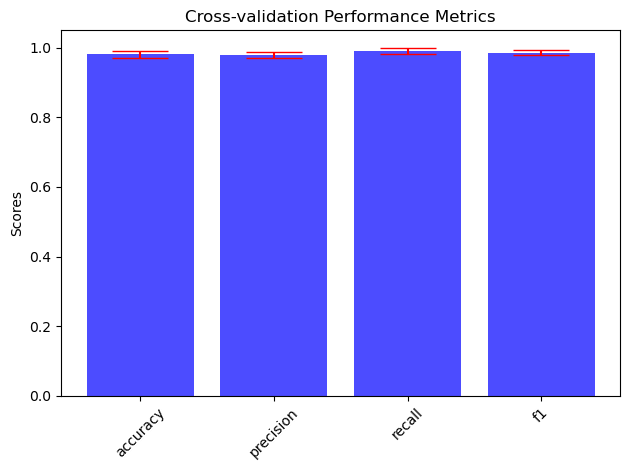

In [32]:
# Filter out the relevant metrics from cv_results
filtered_cv_results = {k: cv_results[k] for k in ['test_accuracy', 'test_precision', 'test_recall', 'test_f1']}

# Calculate means and standard deviations for the metrics
metrics_means = {metric: scores.mean() for metric, scores in filtered_cv_results.items()}
metrics_std = {metric: scores.std() for metric, scores in filtered_cv_results.items()}

# Bar graph test accuracy
labels = [key.split('_')[1] for key in metrics_means.keys()]  
means = list(metrics_means.values())
std_devs = list(metrics_std.values())

plt.bar(labels, means, yerr=std_devs, align='center', alpha=0.7, color='blue', ecolor='red', capsize=20)
plt.ylabel('Scores')
plt.title('Cross-validation Performance Metrics')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

four metrics: accuracy, precision, recall, and F1-score.
All metrics seem to have values close to 1, suggesting that the model performs exceptionally well across all metrics.
The red lines at the top of each bar represent the standard deviation for each metric. 
A shorter line indicates that the model's performance was consistent across different cross-validation folds, while a longer line would indicate higher variability. 
The graph shows that the model is not only accurate (accuracy bar) but also has a high capability to correctly identify positive cases (precision and recall bars) and balances precision and recall effectively (F1-score bar).

In [33]:
# Save to CSV
df1 = pd.DataFrame({'Metric': labels, 'Mean': means, 'Std_dev': std_devs})
df1.to_csv('cross_validation_results.csv', index=False)

In [34]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

# Define parameter ranges (you can adjust these based on your preference and computational power)
n_estimators_range = [50, 100, 150, 200]
max_depth_range = [None, 10, 20, 30]
min_samples_split_range = [2, 4, 6]

# Placeholder for best parameters and score
best_score = 0
best_params = {}
results = []

# Nested loop to search for best parameters
for n_estimators in n_estimators_range:
    for max_depth in max_depth_range:
        for min_samples_split in min_samples_split_range:
            
            rf = RandomForestClassifier(n_estimators=n_estimators, 
                                        max_depth=max_depth, 
                                        min_samples_split=min_samples_split,
                                        random_state=78)
            
            # Use cross-validation to get an average performance metric
            cv_results = cross_validate(rf, X_train, y_train, scoring='accuracy', cv=5)
            score = cv_results['test_score'].mean()
            
            # Store results for this combination
            results.append({
                'score': score, 
                'n_estimators': n_estimators, 
                'max_depth': max_depth, 
                'min_samples_split': min_samples_split
            })
            
            if score > best_score:
                best_score = score
                best_params = {'n_estimators': n_estimators, 
                               'max_depth': max_depth, 
                               'min_samples_split': min_samples_split}

print(f"Best Score: {best_score}")
print("Best Parameters:")
for key, value in best_params.items():
    print(f"{key}: {value}")

Best Score: 0.9837529251170046
Best Parameters:
n_estimators: 150
max_depth: None
min_samples_split: 4


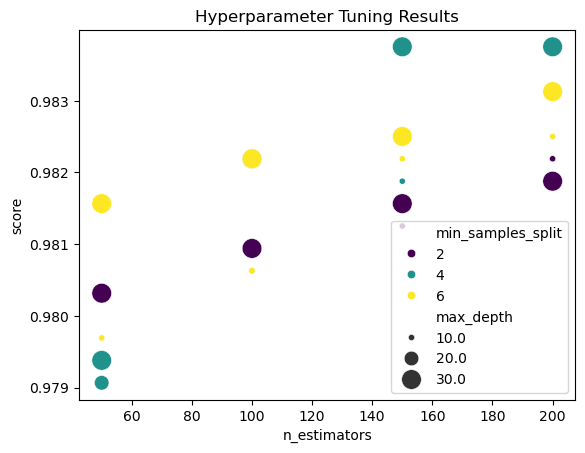

In [35]:
df2 = pd.DataFrame(results)
sns.scatterplot(data=df2, x='n_estimators', y='score', size='max_depth', hue='min_samples_split', palette='viridis', sizes=(20, 200))
plt.title('Hyperparameter Tuning Results')
plt.show()

scatter plot visualizes the results of hyperparameter tuning for a Random Forest model:
The x-axis represents the number of trees (n_estimators) used in the model. It ranges from 60 to 200.
The y-axis displays the accuracy score (score) achieved for each hyperparameter combination.
The color of each point indicates the min_samples_split, which is the minimum number of samples required to make a split at a node. Lighter colors (like yellow) represent smaller values, while darker colors (like purple) indicate larger values.
The size of each point depicts the max_depth of the tree, where larger dots mean deeper trees.
The model achieves the highest accuracy with around 150-160 trees (n_estimators).
A min_samples_split of 2 and greater tree depths tend to yield better results.
In general, models with deeper trees (max_depth) and lower min_samples_split appear to perform slightly better.